In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

zip_file_path = '/content/drive/MyDrive/without_white.zip'
target_directory = '/content'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(target_directory)


In [ ]:
import cv2
import numpy as np
import os
from sklearn.model_selection import train_test_split


dataset_path = "/content/content/path_to_output_directory"
output_path = "preprocessed_dataset"


data = []
labels = []


for class_folder in os.listdir(dataset_path):
    class_folder_path = os.path.join(dataset_path, class_folder)
    label = int(class_folder)
    for image_name in os.listdir(class_folder_path):
        image_path = os.path.join(class_folder_path, image_name)
        image = cv2.imread(image_path)
        resized_image = cv2.resize(image, (255, 255))
        resized_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
        data.append(resized_image)
        labels.append(label)

data = np.array(data)
labels = np.array(labels)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_resnet50(input_shape=(255, 255, 3), num_classes=32):
    base_model = tf.keras.applications.ResNet50(
        include_top=False,
        weights='imagenet',
        input_shape=input_shape
    )
    model = models.Sequential()
    model.add(base_model)
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model
model = create_resnet50()

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


num_epochs = 30
batch_size = 8
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_split=0.1)


test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


Epoch 1/30
172/172 [==============================] - 62s 134ms/step - loss: 3.0361 - accuracy: 0.1771 - val_loss: 25.8569 - val_accuracy: 0.0654
Epoch 2/30
172/172 [==============================] - 21s 119ms/step - loss: 2.0443 - accuracy: 0.3914 - val_loss: 7.4764 - val_accuracy: 0.0915
Epoch 3/30
172/172 [==============================] - 21s 123ms/step - loss: 1.5296 - accuracy: 0.5335 - val_loss: 2.5134 - val_accuracy: 0.4248
Epoch 4/30
172/172 [==============================] - 21s 124ms/step - loss: 1.1286 - accuracy: 0.6414 - val_loss: 1.0274 - val_accuracy: 0.6732
Epoch 5/30
172/172 [==============================] - 21s 119ms/step - loss: 0.8377 - accuracy: 0.7391 - val_loss: 0.7134 - val_accuracy: 0.7647
Epoch 6/30
172/172 [==============================] - 20s 119ms/step - loss: 0.7576 - accuracy: 0.7617 - val_loss: 0.6690 - val_accuracy: 0.8301
Epoch 7/30
172/172 [==============================] - 21s 121ms/step - loss: 0.5488 - accuracy: 0.8353 - val_loss: 2.2125 - val_a

In [ ]:
predictions = model.predict(X_test)

from sklearn.metrics import confusion_matrix

y_pred = np.argmax(predictions, axis=1)

confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)


12/12 [==============================] - 2s 114ms/step
Confusion Matrix:
[[ 5  0  2 ...  0  0  0]
 [ 0  9  0 ...  0  0  0]
 [ 0  0 17 ...  0  0  0]
 ...
 [ 0  0  0 ... 11  0  0]
 [ 0  0  0 ...  0 10  0]
 [ 0  0  0 ...  0  0 11]]


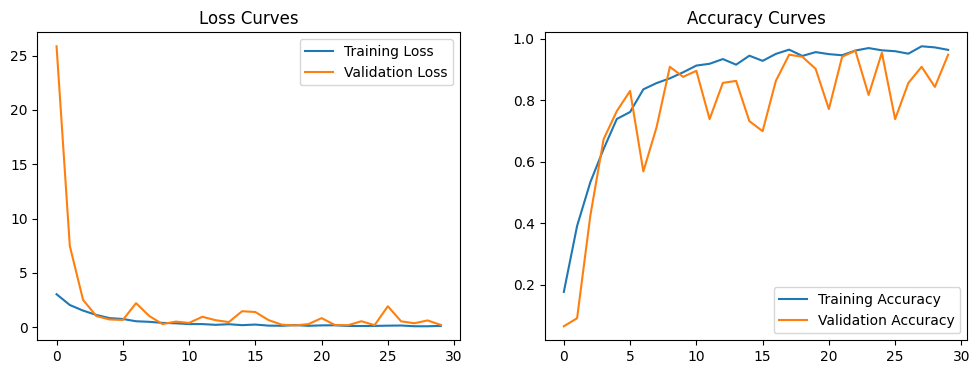

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Curves')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Curves')

plt.show()
